# Day 22 Boundaries
### Inspired by the classic dilemma of what is the extension of London came to my mind, what is Mexico City? Well, in this map I present its extension taking into account its metropolitan area, political demarcation and the land which is urban.

In [35]:
%matplotlib inline

import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from cartopy import crs as ccrs

In [4]:
CDMX = gpd.read_file("shapes/CDMX.shp")
Ciudad = gpd.read_file("shapes/Ciudad32614.shp")
ZMVM = gpd.read_file("shapes/ZMVM.shp")

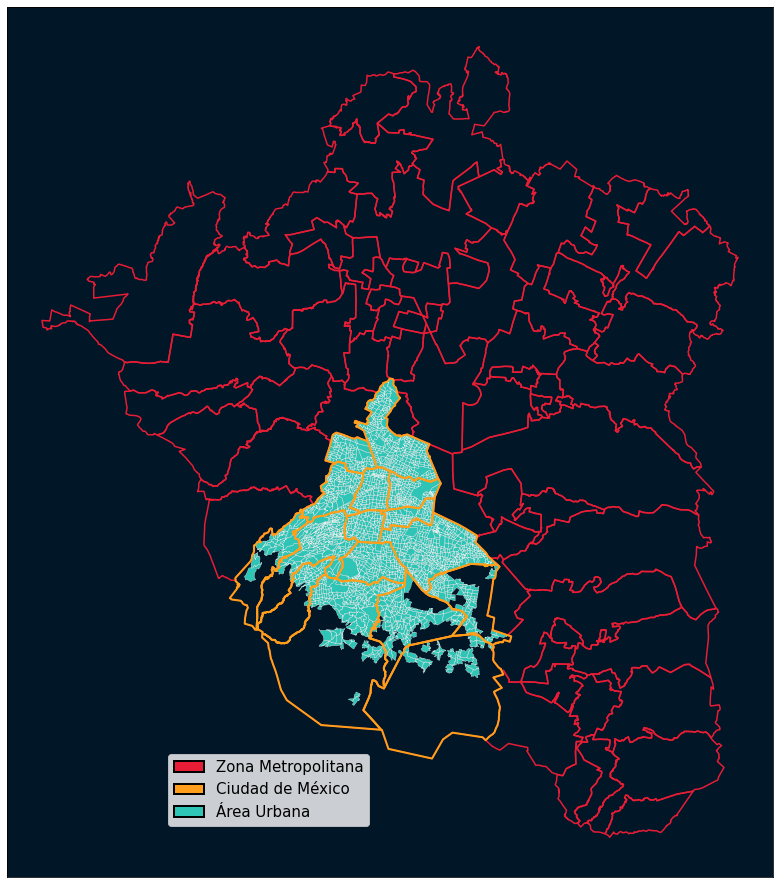

In [62]:
f, ax = plt.subplots(1,figsize=(20, 16))

# Removes ticks and labels for lat/lon
ax.tick_params(
    axis='both', bottom=False, left=False,         
    labelbottom=False, labelleft=False) 

ZMVM.boundary.plot(ax = ax, linewidth = 1.5, edgecolor = "#e71d36", zorder = 1)
CDMX.boundary.plot(ax = ax, linewidth = 2, color = "#ff9f1c", zorder = 4)
Ciudad.boundary.plot(ax = ax, linewidth = 0.3, color = "#fdfffc", zorder = 3)
Ciudad.plot(ax = ax, color = "#2ec4b6", zorder = 2)

#ax.set_title('Ciudad de México', fontsize=25, pad=10)
ax.set_facecolor('#011627')

# Adds the legend above to the current axes in the figure
list_of_ions = ['Zona Metropolitana', 'Ciudad de México','Área Urbana']

color_dict = {'Zona Metropolitana':'#e71d36',
            'Ciudad de México':'#ff9f1c',
            'Área Urbana':'#2ec4b6'}

# Creates a rectangular patch for each contaminant, using the colors above
patch_list =[]

for ion in list_of_ions:
    label = ion
    color = color_dict[ion]
    patch_list.append(patches.Patch(facecolor=color, 
                                    label=label, 
                                    alpha=1.0, 
                                    linewidth=2, 
                                    edgecolor='black'))

# Creates a legend with the list of patches above.
ax.legend(handles=patch_list, fontsize=15, loc='lower left',
        bbox_to_anchor = (.2,0.05), title_fontsize=45)


plt.show()

In [63]:
# Save figure
out_file = "CDMX.png"
ax.figure.savefig(out_file, bbox_inches="tight", dpi=600)